In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testing/catdog_testing/dog1.jpg
/kaggle/input/testing/catdog_testing/cat2.jpg
/kaggle/input/testing/catdog_testing/dog2.jpg
/kaggle/input/testing/catdog_testing/cat1.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4885.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4796.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4893.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4643.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4604.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4122.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4662.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4707.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4533.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4151.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4920.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4348.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4218.jpg
/kaggle/in

In [2]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
#from tensorflow.keras.utils.np_utils import to_categorical
import random,shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model


In [3]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

BS= 16
TS=(24,24)

In [4]:
train_batch= generator('../input/cat-and-dog/training_set/training_set',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('../input/cat-and-dog/test_set/test_set',shuffle=True, batch_size=BS,target_size=TS)

SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
       Dense(2, activation='softmax')
])


In [6]:
os.mkdir('/kaggle/working/models')

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(train_batch, validation_data=valid_batch,epochs=20,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/cnnCat2.h5')

Epoch 1/20
500/500 [==============================] - 61s 122ms/step - loss: 0.6930 - accuracy: 0.5233 - val_loss: 0.6844 - val_accuracy: 0.5570
Epoch 2/20
500/500 [==============================] - 46s 92ms/step - loss: 0.6679 - accuracy: 0.5918 - val_loss: 0.6503 - val_accuracy: 0.6200
Epoch 3/20
500/500 [==============================] - 45s 91ms/step - loss: 0.6256 - accuracy: 0.6538 - val_loss: 0.6295 - val_accuracy: 0.6518
Epoch 4/20
500/500 [==============================] - 65s 130ms/step - loss: 0.5943 - accuracy: 0.6837 - val_loss: 0.6554 - val_accuracy: 0.6329
Epoch 5/20
500/500 [==============================] - 47s 94ms/step - loss: 0.5494 - accuracy: 0.7182 - val_loss: 0.6104 - val_accuracy: 0.6721
Epoch 6/20
500/500 [==============================] - 45s 91ms/step - loss: 0.4892 - accuracy: 0.7557 - val_loss: 0.6149 - val_accuracy: 0.6925
Epoch 7/20
500/500 [==============================] - 46s 92ms/step - loss: 0.4217 - accuracy: 0.8055 - val_loss: 0.6239 - val_accurac

In [8]:
model = load_model('./models/cnnCat2.h5', compile = True)


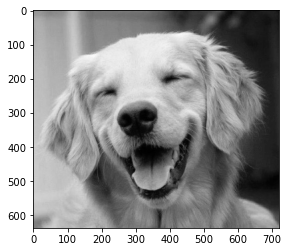

[[9.9950528e-01 4.9466995e-04]]
DOG


In [9]:
import cv2
IMG_SIZE = 300
img_array = cv2.imread("../input/testing/catdog_testing/dog2.jpg" ,cv2.IMREAD_GRAYSCALE) 
plt.imshow(img_array, cmap='gray')
IMG_SIZE = 24
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array/255.0, cmap='gray')
plt.show()

new_array=np.reshape(new_array,(24, 24, 1))
new_array=new_array.flatten()/255.0
new_array_2=np.reshape(new_array,(1,24,24,1))

#to predict single image
class_prob=model.predict(new_array_2.T,batch_size=1)
print(class_prob)
classifications=model.predict_classes(new_array_2.T,batch_size=1)
if classifications == [1]:
    print("CAT") 
else:
    print("DOG")